In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

# Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.
As we can see in the below heatmap, Alcohols, Sulphates. volatile acidity, fixed acidity, citric acid are the most related features for predicting the quality of the wine.

Alcohols, sulphates, fixed acidity, citric acid are positively related with the quality of the wine.

Volatile acidity is negatively related with the quality of the red wine e=with the correlation value of -0.39.

Chlorodes, total sulphur dioxides and density are also negatively correlated with the quality of the red wine.

Alcohol is the most positively correlated feature in predicting the quality of the red wine.

<AxesSubplot: >

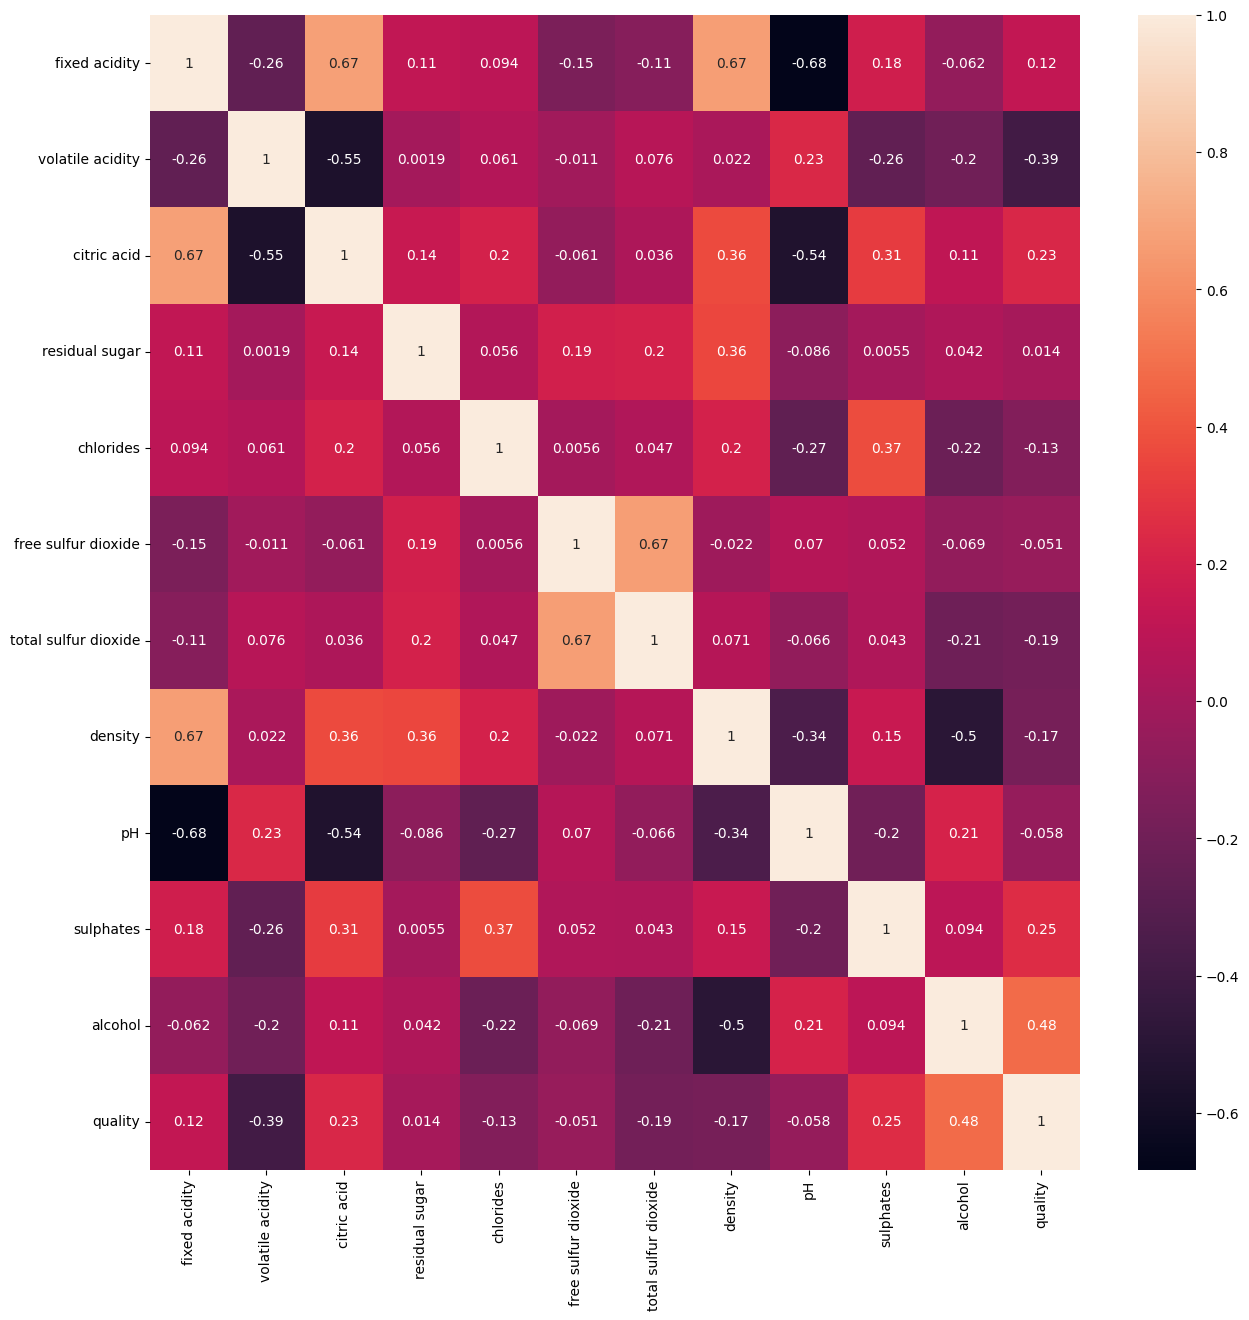

In [3]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

# Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

Actually, Given red wine quality dataset do not contain any missing datapoint. But if there are missing values in the dataset, then we can use the different central mean tendencies for handelling missing values.
1. Mean: 
Mean s the average of all the datapoints in a given feature.
If the data is continuous and do not contains outliers then we can use mean for handelling missing values.
We can use mean of the specific feature for filling the missing values. By using this, we can handle the missing data points effectively.
But if there were outliers present in the data then using mean is not favourable because mean s very sensitive to outliers.
In such cases, we should use the median.

2. Median: 
Median is also used for continuous data.
Median is the middle value in any feature.
If there are outliers present in the dataset, then median can be very useful as it is not at all sensitive to outliers.
We can replace the missing values with the median.

3. Mode: 
If the feature is categorical, then in such cases, we cannot calculate the mean and median. 
So we use mode in such cases.
Mode is the element with the maximum frequency in the dataset.
We fill missing categories using the mode of the corresponding feature.


This are the techniques to handle missing values in any dataset.

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?
Gender, race/ethnicity and lunch are found to be the key factors in the students' overall performance.
Following code shows the statistical techniques and visualizations which i used in analysing the students' performance.

In [5]:
df = pd.read_csv("StudentsPerformance.csv")

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df['Average'] = (df['math score'] + df['reading score'] + df['writing score'])/3

From the below graph, i can say that Girls are performing better than the boys

<AxesSubplot: xlabel='Average', ylabel='Count'>

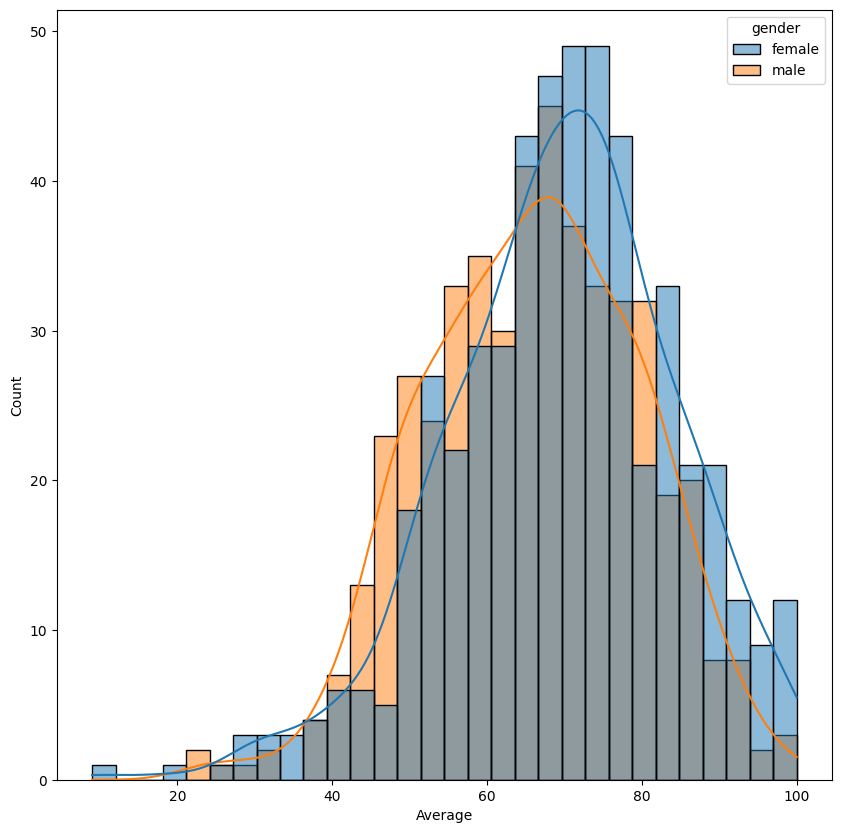

In [8]:
plt.figure(figsize=(10,10))
sns.histplot(data = df, x=df['Average'], kde=True, bins = 30, hue = 'gender')

From the below graph, group c students are performing better than all other groups followed by group D, then group B, E and last group A.

<AxesSubplot: xlabel='Average', ylabel='Count'>

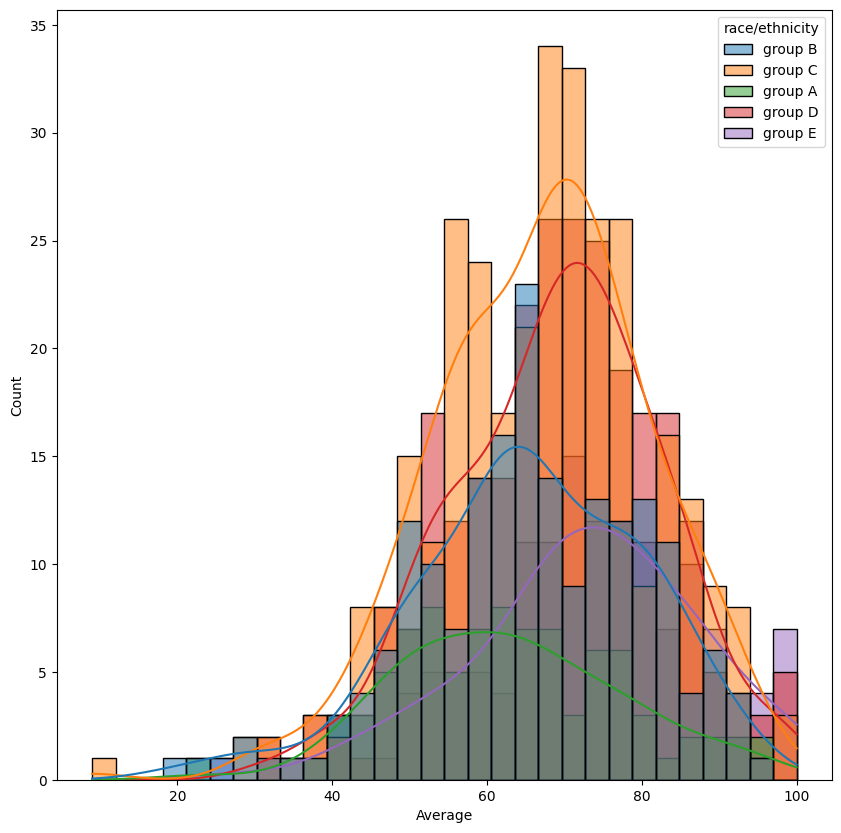

In [9]:
plt.figure(figsize=(10,10))
sns.histplot(data = df, x=df['Average'], kde=True, bins = 30, hue = 'race/ethnicity')

Students who gets standard lunch are performing much more better than the students who eats free/reduced lunch.
Lunch is a key factor in the students' overal performance.

<AxesSubplot: xlabel='Average', ylabel='Count'>

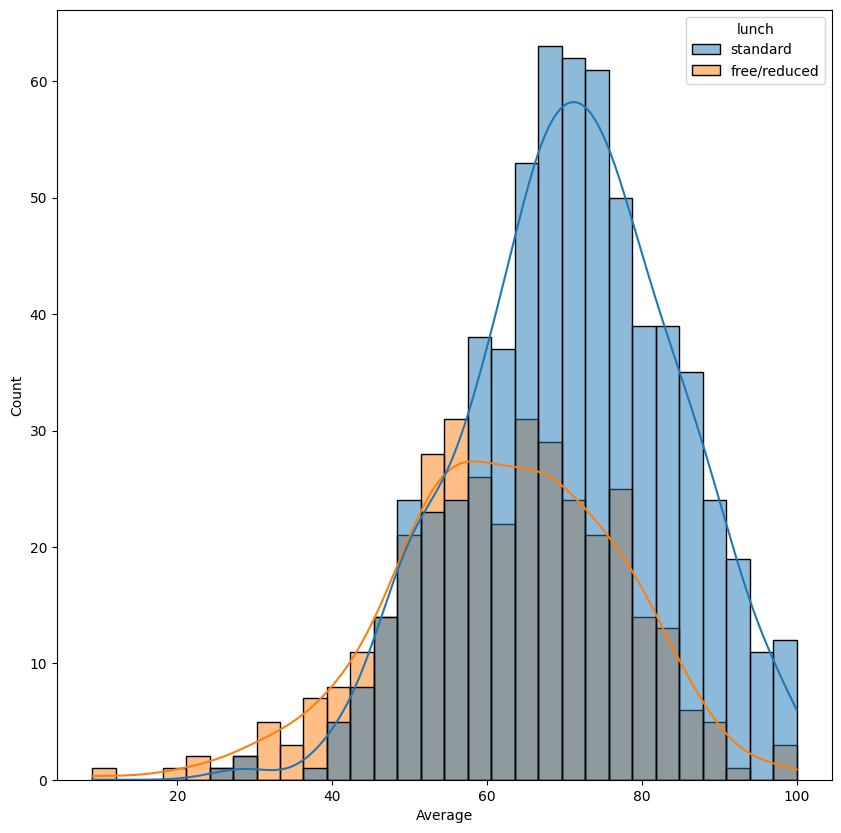

In [10]:
plt.figure(figsize=(10,10))
sns.histplot(data = df, x=df['Average'], kde=True, bins = 30, hue = 'lunch')

Parents level of educatioo did not matter that much.

<AxesSubplot: xlabel='Average', ylabel='Count'>

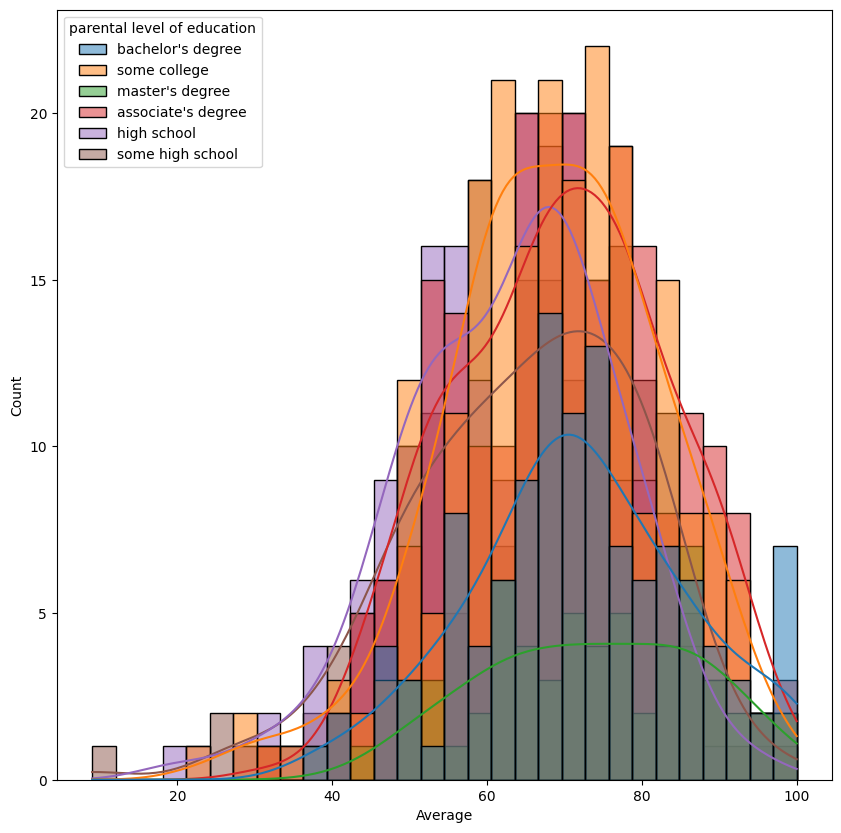

In [11]:
plt.figure(figsize=(10,10))
sns.histplot(data = df, x=df['Average'], kde=True, bins = 30, hue = 'parental level of education')

# Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?
I will first of all seperate the numerical and the categorical features. 
After than , there are three features which tell about the students performance in math. reading and writing. So i will take the average of all three and create a new column average so that i can compares students performancebased on the average only.
Then for converting categorical features into numerical, we use endoing techniqes.
I will use Nominal encoding or label encoding for converting the categorical variables into the numerical data.
Now we will be ready to train the model with this dataset.

# Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

Density, pH, fixed acidity are normally distibuted.
Volatile acidity and citric acid contains different variations and are not normally distributed.
Residual sugars , chlorides, free sulphuric dioxide, total sulphuric dioxide, sulphates and alcohols are right skewed and are not normally distibuted.

We can use following transformations for converting this non normal features into normal features.

Box-Cox transformation: The Box-Cox transformation is a popular method for transforming non-normal data into normal data. It involves taking the logarithm of the data and raising it to a power that maximizes the normality of the data.

Log transformation: Another simple transformation method is to take the logarithm of the data. This can be particularly effective when dealing with data that is skewed to the right.

Z-score standardization: Z-score standardization involves subtracting the mean of the data and dividing by the standard deviation. This converts the data into standard units and can make it easier to compare and analyze.


In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

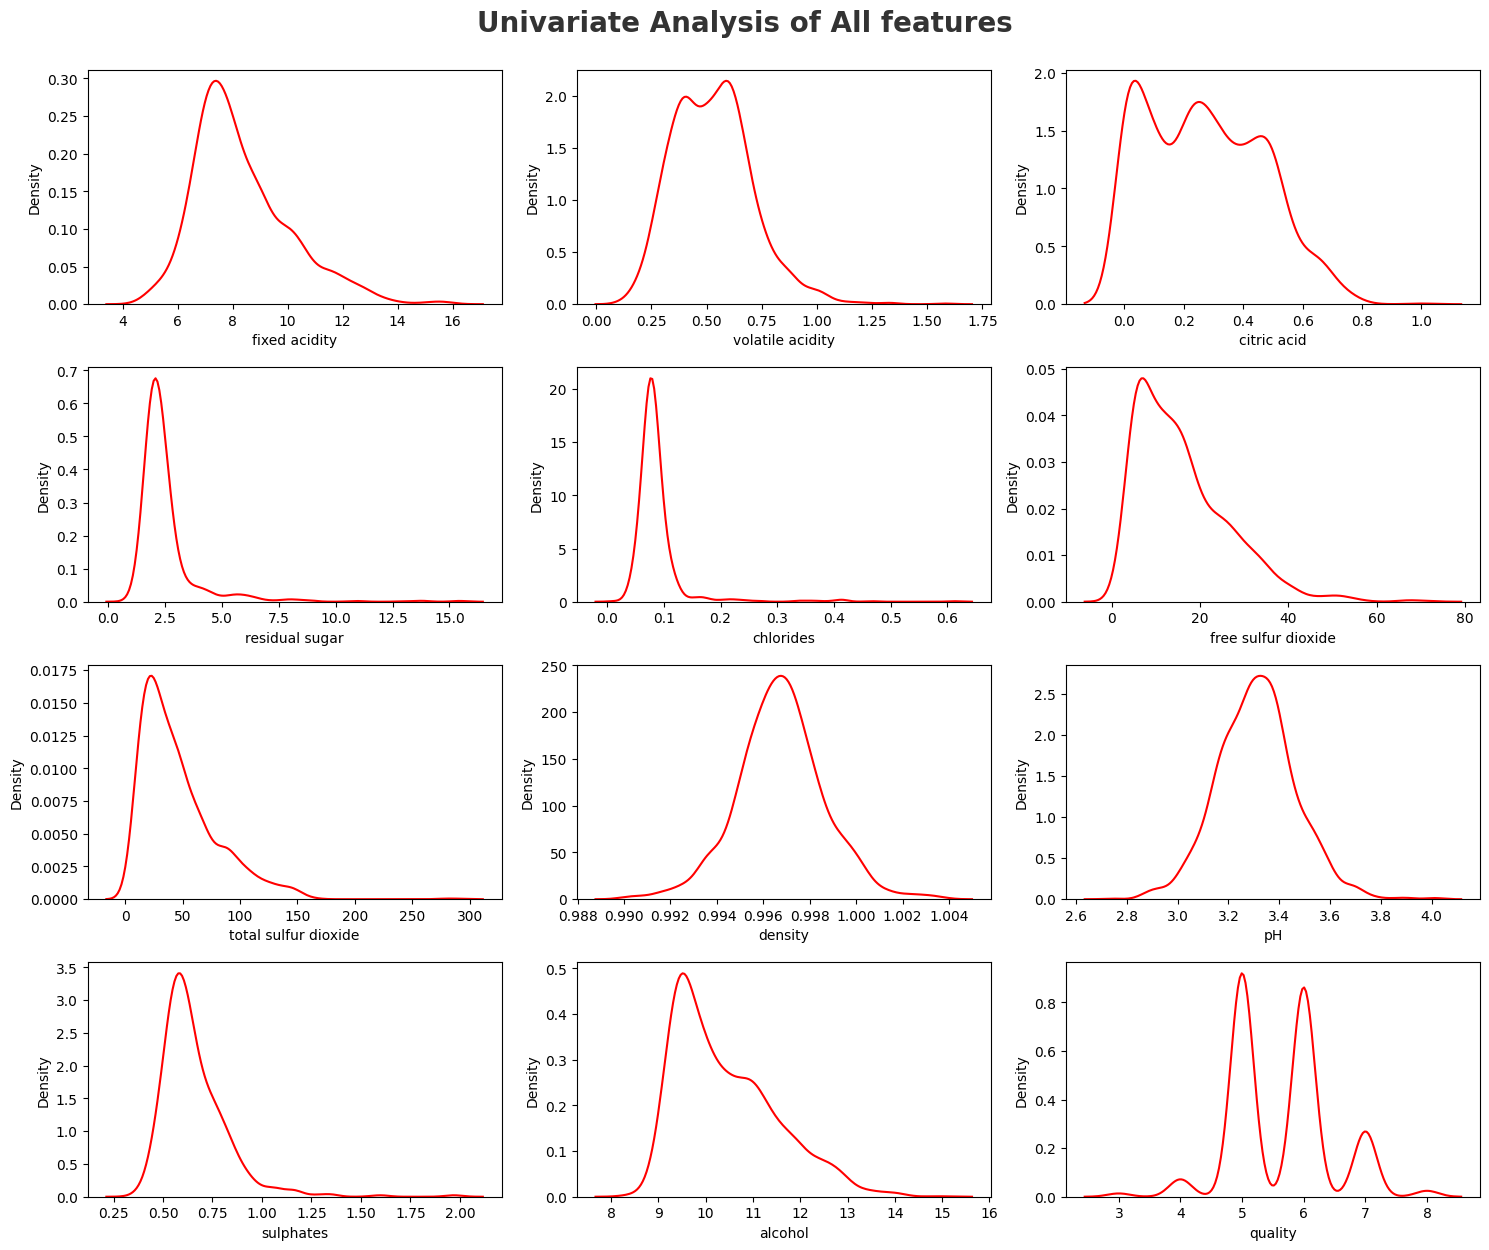

In [13]:
plt.figure(figsize=(15,15))

plt.suptitle("Univariate Analysis of All features", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

dd = df.columns.array
dd
for i in range(0, len(dd)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[dd[i]],  color='r')
    plt.xlabel(dd[i])
    plt.tight_layout()

# Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

Minimum seven components are erquired to explain 90% of the variance in the data

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [33]:
scaler = StandardScaler()

In [29]:
X = df.iloc[:, :len(df.columns)-1]
Y = df.iloc[:, -1]

In [34]:
x_scaled = scaler.fit_transform(X)

In [36]:
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

In [38]:
explained_variance_ratio = pca.explained_variance_ratio_

In [40]:
total_variance_ratio = 0
n_components = 0

for ratio in explained_variance_ratio :
    total_variance_ratio += ratio
    n_components += 1
    if total_variance_ratio >= 0.9:
        break

In [42]:
n_components, total_variance_ratio

(7, 0.9083190640939514)